In [1]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
%matplotlib inline

In [2]:
df = pd.read_csv('Datasets/titanic_train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [6]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [7]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\Musadaq Tanvir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


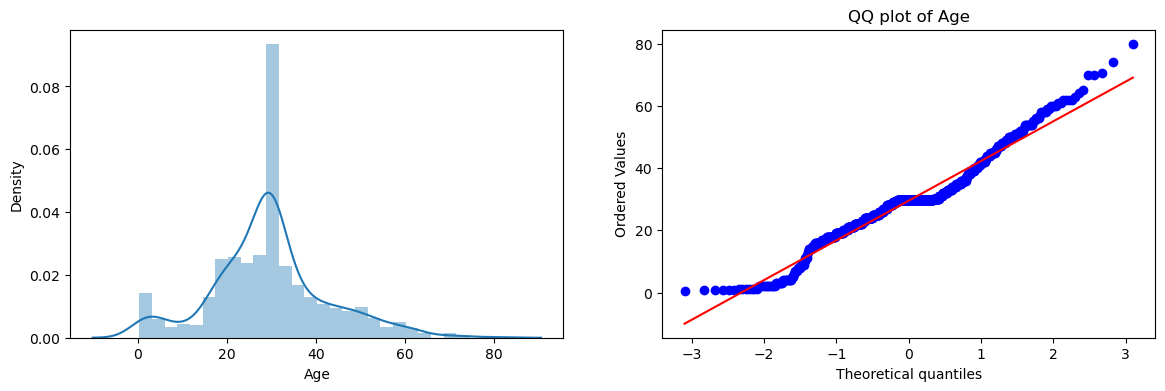

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])

plt.subplot(122)
#stats.probplot(X_train['Age'])
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('QQ plot of Age')
plt.show()

In [10]:
X_train['Age'].skew()

0.3599658846236587

C:\Users\Musadaq Tanvir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


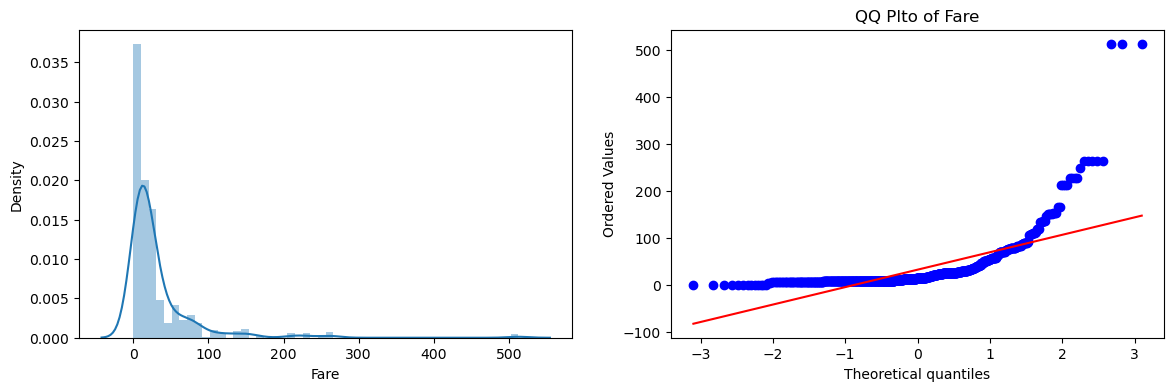

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])

plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('QQ Plto of Fare')
plt.show()

In [12]:
X_train['Fare'].skew()

4.875065571137606

In [13]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [14]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
lpred= clf.predict(X_test)
Tpred = clf2.predict(X_test)

In [16]:
accuracy_score(y_test,lpred)

0.6480446927374302

In [17]:
accuracy_score(y_test,Tpred)

0.6759776536312849

In [18]:
trf = FunctionTransformer(func=np.log1p)


In [19]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [20]:
clf1 = LogisticRegression()
clf22 = DecisionTreeClassifier()

In [21]:
clf1.fit(X_train_transformed,y_train)
clf22.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [22]:
y1 = clf1.predict(X_test_transformed)
y2 = clf22.predict(X_test_transformed)

In [23]:
accuracy_score(y_test,y1)

0.6815642458100558

In [24]:
accuracy_score(y_test,y2)

0.6815642458100558

In [25]:
X_transform = trf.fit_transform(X)

In [26]:
clf = LogisticRegression()
clfDt = DecisionTreeClassifier()

In [27]:
np.mean(cross_val_score(clf,X_transform,y,scoring='accuracy',cv=10))


0.678027465667915

In [28]:
np.mean(cross_val_score(clfDt,X_transform,y,scoring='accuracy',cv=10))

0.6644569288389515

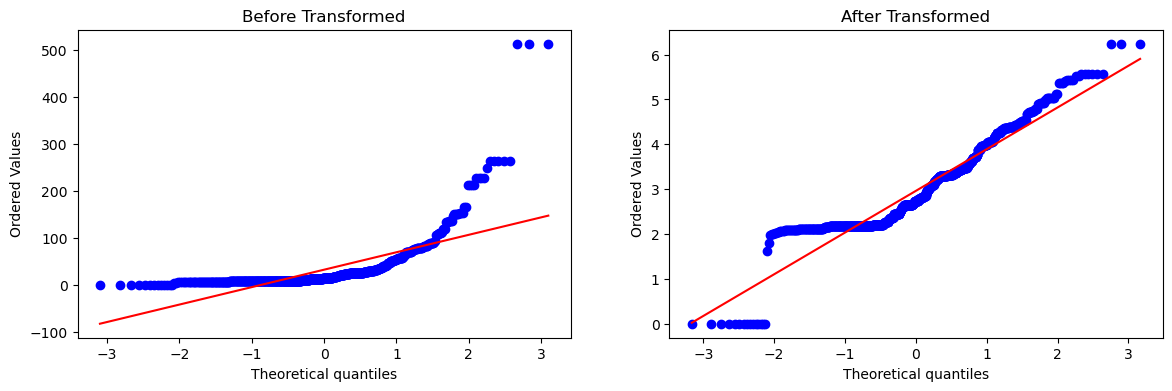

In [30]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Before Transformed')
plt.subplot(122)
stats.probplot(X_transform['Fare'],dist='norm',plot=plt)
plt.title('After Transformed')
plt.show()

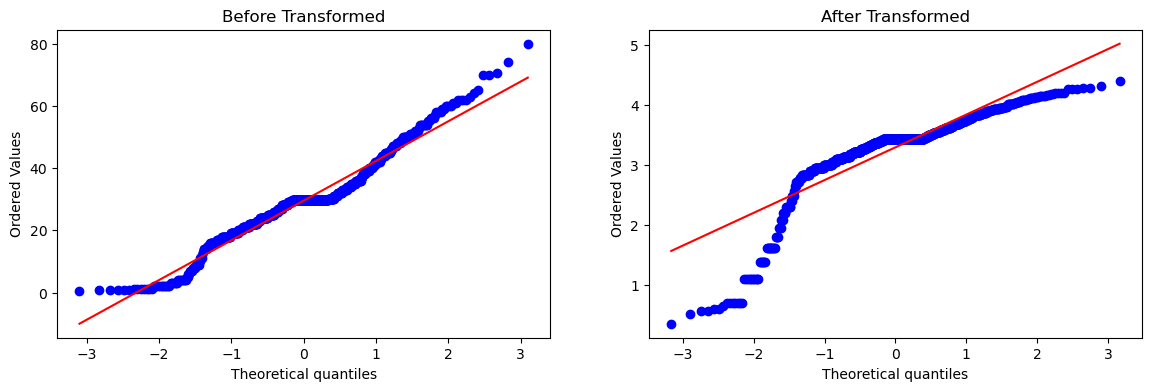

In [31]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Before Transformed')
plt.subplot(122)
stats.probplot(X_transform['Age'],dist='norm',plot=plt)
plt.title('After Transformed')
plt.show()

In [40]:
def apply_transform(transform):
    X = df.iloc[:,1:]
    y = df.iloc[:,0]
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    X_trans = trf.fit_transform(X)
    clf = LogisticRegression()
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(X['Fare'],dist='norm',plot=plt)
    plt.title('Before Transformation')
    
    plt.subplot(122)
    stats.probplot(X_trans[:,0],dist='norm',plot=plt)
    plt.title('After Transformation')
    plt.show()

Accuracy 0.6442446941323345


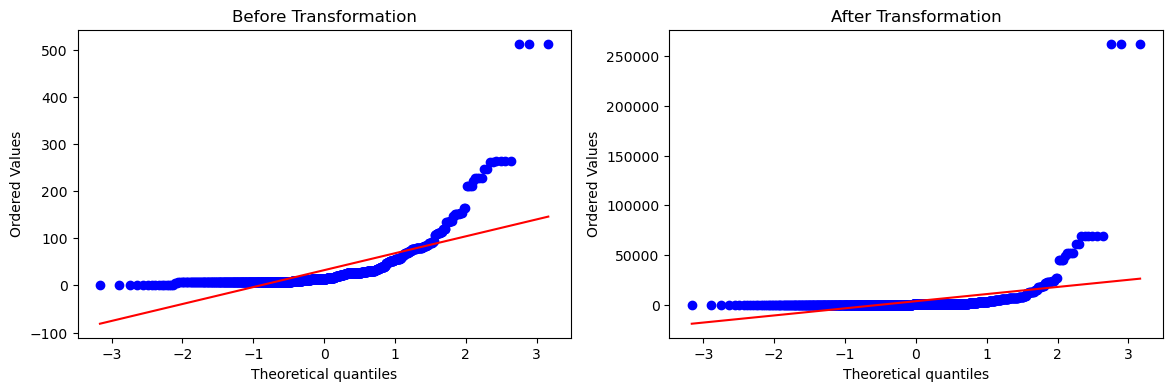

In [42]:
apply_transform(lambda X: X**2)